In [1]:
import pandas as pd
import numpy as np

In [3]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

In [4]:
from sklearn.linear_model import LassoLarsCV

In [5]:
data = pd.read_csv("/home/lemina/Downloads/tree_addhealth.csv")

data_clean = data.dropna()
d = pd.DataFrame(data_clean)
d

,BIO_SEX,HISPANIC,WHITE,BLACK,NAMERICAN,ASIAN,age,TREG1,ALCEVR1,ALCPROBS1,...,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
1,2.0,0.0,0.0,1.0,0.0,0.0,19.427397,1.0,1.0,1,...,35.0,1.0,0,5.0,22.0,2.333333,0.0,23.3,9.0,15.0
3,1.0,0.0,0.0,1.0,0.0,0.0,20.430137,1.0,0.0,0,...,47.0,4.0,1,4.0,19.0,2.000000,0.0,18.7,6.0,14.0
5,1.0,0.0,0.0,1.0,0.0,0.0,14.509589,0.0,0.0,0,...,41.0,3.0,0,0.0,27.0,2.666667,0.0,23.7,3.0,13.0
6,1.0,0.0,0.0,1.0,0.0,0.0,13.676712,0.0,0.0,0,...,42.0,5.0,0,7.0,18.0,2.500000,0.0,24.7,6.0,13.0
7,1.0,0.0,1.0,0.0,0.0,0.0,15.178082,1.0,1.0,0,...,40.0,8.0,1,6.0,20.0,1.500000,0.0,22.3,10.0,14.0
8,1.0,0.0,0.0,1.0,0.0,0.0,14.673973,0.0,1.0,0,...,39.0,0.0,0,5.0,24.0,2.250000,0.0,19.0,8.0,15.0
9,1.0,0.0,1.0,0.0,0.0,0.0,14.926027,0.0,0.0,0,...,37.0,1.0,0,2.0,25.0,2.500000,0.0,24.3,3.0,11.0
10,1.0,0.0,0.0,1.0,0.0,0.0,15.591781,0.0,0.0,0,...,46.0,1.0,0,2.0,27.0,3.250000,0.0,20.0,3.0,13.0
11,1.0,0.0,0.0,1.0,0.0,0.0,17.342466,0.0,0.0,0,...,38.0,0.0,0,1.0,30.0,2.000000,0.0,23.0,9.0,11.0
12,1.0,0.0,1.0,0.0,0.0,0.0,16.342466,0.0,0.0,0,...,40.0,0.0,0,0.0,29.0,2.250000,0.0,24.0,8.0,14.0


In [6]:
data.columns = map(str.upper, data.columns)
data_clean = data.dropna()


predvars= data_clean[['HISPANIC','WHITE','NAMERICAN','ASIAN','AGE',
'ALCEVR1','ALCPROBS1','MAREVER1','COCEVER1','INHEVER1','CIGAVAIL','DEP1','VIOL1','PASSIST','DEVIANT1','GPA1','EXPEL1','FAMCONCT',
                    'PARACTV','PARPRES']]

target = data_clean.ESTEEM1


In [7]:
predictors=predvars.copy()
from sklearn import preprocessing


predictors['HISPANIC']=preprocessing.scale(predictors['HISPANIC'].astype('float64'))
predictors['WHITE']=preprocessing.scale(predictors['WHITE'].astype('float64'))
predictors['NAMERICAN']=preprocessing.scale(predictors['NAMERICAN'].astype('float64'))
predictors['ASIAN']=preprocessing.scale(predictors['ASIAN'].astype('float64'))
predictors['AGE']=preprocessing.scale(predictors['AGE'].astype('float64'))
predictors['ALCEVR1']=preprocessing.scale(predictors['ALCEVR1'].astype('float64'))
predictors['ALCPROBS1']=preprocessing.scale(predictors['ALCPROBS1'].astype('float64'))
predictors['MAREVER1']=preprocessing.scale(predictors['MAREVER1'].astype('float64'))
predictors['COCEVER1']=preprocessing.scale(predictors['COCEVER1'].astype('float64'))
predictors['INHEVER1']=preprocessing.scale(predictors['INHEVER1'].astype('float64'))
predictors['CIGAVAIL']=preprocessing.scale(predictors['CIGAVAIL'].astype('float64'))
predictors['DEP1']=preprocessing.scale(predictors['DEP1'].astype('float64'))
predictors['VIOL1']=preprocessing.scale(predictors['VIOL1'].astype('float64'))
predictors['PASSIST']=preprocessing.scale(predictors['PASSIST'].astype('float64'))
predictors['DEVIANT1']=preprocessing.scale(predictors['DEVIANT1'].astype('float64'))
predictors['GPA1']=preprocessing.scale(predictors['GPA1'].astype('float64'))
predictors['EXPEL1']=preprocessing.scale(predictors['EXPEL1'].astype('float64'))
predictors['FAMCONCT']=preprocessing.scale(predictors['FAMCONCT'].astype('float64'))
predictors['PARACTV']=preprocessing.scale(predictors['PARACTV'].astype('float64'))
predictors['PARPRES']=preprocessing.scale(predictors['PARPRES'].astype('float64'))


In [8]:
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, 
                                                              test_size=.3, random_state=123)

In [9]:

# specify the lasso regression model
model=LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)

In [10]:
# print variable names and regression coefficients
dict(zip(predictors.columns, model.coef_))

{'AGE': 0.009843009604915966,
 'ALCEVR1': 0.0,
 'ALCPROBS1': -0.009248516623170954,
 'ASIAN': -0.29487198598441755,
 'CIGAVAIL': -0.07992971924462822,
 'COCEVER1': 0.0304146767184943,
 'DEP1': -1.82195336793928,
 'DEVIANT1': -0.04894507528481018,
 'EXPEL1': -0.037092213800631595,
 'FAMCONCT': 1.5699029264622575,
 'GPA1': 0.23522636868325145,
 'HISPANIC': -0.0941510199814354,
 'INHEVER1': -0.2252495197577598,
 'MAREVER1': 0.0804352853001614,
 'NAMERICAN': -0.09373970426706163,
 'PARACTV': 0.4102870340524679,
 'PARPRES': -0.17072898347303417,
 'PASSIST': -0.008808081366868593,
 'VIOL1': 0.42295315341628886,
 'WHITE': -0.4791049624693341}

Text(0.5,1,u'Regression Coefficients Progression for Lasso Paths')

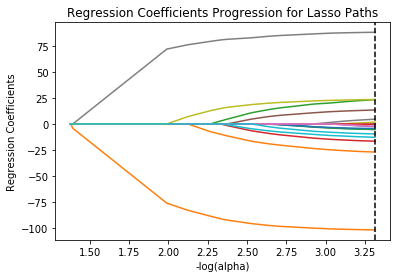

In [11]:
# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

Text(0.5,1,u'Mean squared error on each fold')

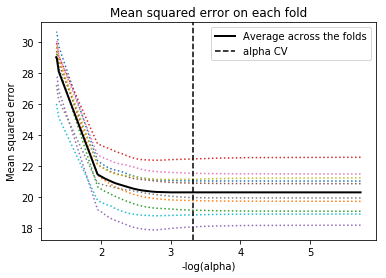

In [15]:
np.seterr(divide='ignore')
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.mse_path_, ':')
plt.plot(m_log_alphascv, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

In [16]:
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

training data MSE
20.049971480543306
test data MSE
20.58777070005252


In [17]:
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

training data R-square
0.30904904851306236
test data R-square
0.28319881853167805
